In [1]:
from astropy.table import Table
from astropy.io import fits
from astropy.time import Time
import matplotlib.pyplot as plt

# Replace with the path to your file
lc_file_path = "../products/0865600201/pn/pn_src_lc.fits"

# Read the RATE table to get time and rate columns
lc_table = Table.read(lc_file_path, hdu="RATE")
time = lc_table['TIME']
rate = lc_table['RATE']

# Read the primary header
with fits.open(lc_file_path) as hdul:
    primary_header = hdul[0].header
    expstart = primary_header.get('EXPSTART', 0)

# Convert EXPSTART to Time object
expstart_time = Time(expstart, format='isot', scale='utc')
print(f"EXPSTART: {expstart_time.iso}")
print(f"EXPSTART in MJD: {expstart_time.mjd:.2f}")


time_relative = time - time[0]

# Convert to days
time_days = time_relative / 86400.0

EXPSTART: 2020-03-26 06:53:01.000
EXPSTART in MJD: 58934.29


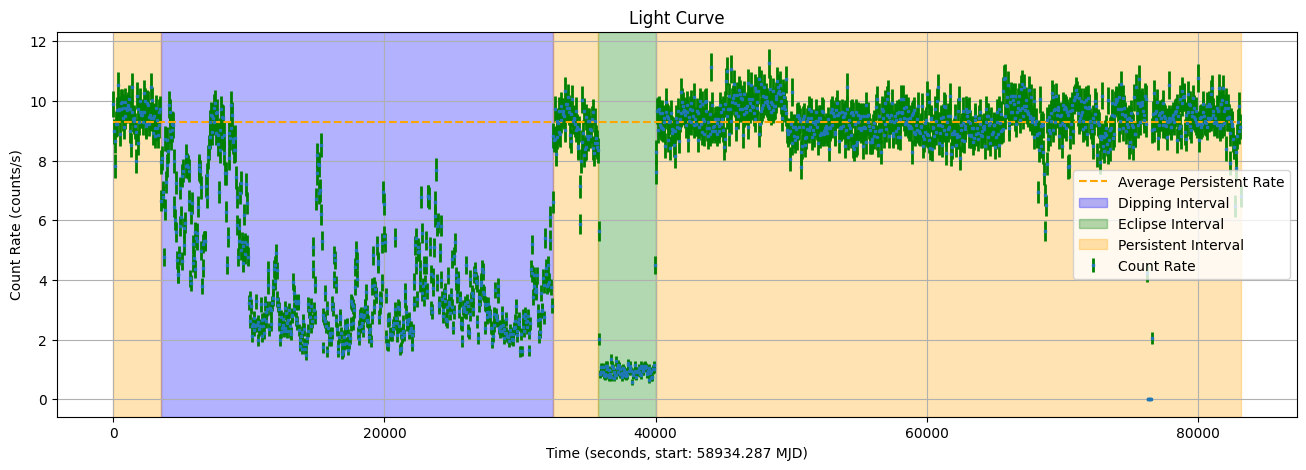

In [2]:
# Plot with time since MJD start
plt.figure(figsize=(16,5), dpi=100)
plt.errorbar(time_relative, rate, yerr=lc_table['ERROR'], fmt='s', markersize=2, alpha=1, elinewidth=2,ecolor='green',label='Count Rate')
plt.xlabel(f'Time (seconds, start: {expstart_time.mjd:.3f} MJD)')
plt.ylabel('Count Rate (counts/s)')
plt.title('Light Curve')

#define dipping, eclipse, and persistent intervals
persistent_intervals = [(time_relative[0],3510),(32430,35780),(40000, time_relative[-1])]
dipping_intervals = (3510, 32430)
eclipse_intervals = (35780, 40000)


#average count rate for both persistent intervals
persistent_mask = ((time_relative >= persistent_intervals[0][0]) & (time_relative <= persistent_intervals[0][1])) | \
                  ((time_relative >= persistent_intervals[1][0]) & (time_relative <= persistent_intervals[1][1]) | \
                  ((time_relative >= persistent_intervals[2][0]) & (time_relative <= persistent_intervals[2][1])))
persistent_rate = rate[persistent_mask]
average_persistent_rate = persistent_rate.mean()
plt.hlines(average_persistent_rate, time_relative[0], time_relative[-1], colors='orange', linestyles='dashed', label='Average Persistent Rate')



# Highlight intervals
plt.axvspan(dipping_intervals[0], dipping_intervals[1], color='blue', alpha=0.3, label='Dipping Interval')

plt.axvspan(eclipse_intervals[0], eclipse_intervals[1], color='green', alpha=0.3, label='Eclipse Interval')

plt.axvspan(persistent_intervals[0][0], persistent_intervals[0][1], color='orange', alpha=0.3, label='Persistent Interval')
plt.axvspan(persistent_intervals[1][0], persistent_intervals[1][1], color='orange', alpha=0.3)
plt.axvspan(persistent_intervals[2][0], persistent_intervals[2][1], color='orange', alpha=0.3)

plt.legend(loc='best')
plt.grid()
plt.show()


Orbital period: 21.3 hr
Dipping interval ~ 28920 s (8.03 hr), roughly 37.7% of the orbital period.
Implies extensive structure in the accretion disk.
Shallow dipping (?) region from ~>65000 s might be edge of structure causing shallow dips.




In [11]:
print(35780+time[0],time[0]+ 40000)


701628654.218876 701632874.218876
